<img src="https://brand.umich.edu/assets/brand/style-guide/logo-guidelines/U-M_Logo-Horizontal-Hex.png" alt="Drawing" style="width: 300px;" align="left"/><br>

# Week 1: Exploratory Data Analysis

A key idea behind data exploration is what John Behrens, who you will read in Week 3, refers to as building a “mental model” of the phenomenon of interest. The phenomenon of interest for the eventual model that you will start building in Week 3 is students' likelihood of not passing an online, self-directed course. In developing a mental model, we want you to think about what might be predictive of eventual course success. Oftentimes, what is predictive is commonsensical: students’ completion and performance on assessments, for example.

If you want additional examples, the optional reading by Kuzilek, Hlosta, Herrmannova, Zdrahal, Vaclavek,  & Wolf (2015) illustrates their efforts to build a classification model using Open University data, which is the same source as the data we will be exploring in this notebook.

Below are some starter ideas for features to explore. In looking at the list, think about how different actions that students take are translated into data that are collected and stored by the OU online system.
- Order of events
- Differences from class average / median
- % of learning resources accessed from a defined set
- Ratios of activities by "session" or day
- Time between events (i.e., gaps)
- Activity in "first 5 or 10 events" 
- Activity that "starts" a session or precedes / follows an assessment
- Differences from due dates (i.e., early / late)
- Scores on assignments
- Whether or not an assignment was turned in, regardless of score

The data work that we engage in for the purpose of “developing a mental model” in this first notebook will be much simpler as compared to the Notebooks 2 and 3, which are structured around unsupervised and supervised machine learning tasks, respectively. In many ways, this first notebook is intended to get you familiar with a typical “learning analytics” datasets that includes demographic, assessment, and log data.

### Dictionary
- **student_info.csv**
    - **id_student** = numeric; unique identifier for each student in the course
    - **gender** = character; M = "male", F = "female"
    - **highest_education** = character; “Some Graduate”, “Some Higher Education”, “High School + Advanced Placement”, “High School”, “No Formal Quals” (Categories ordered from highest documented education level attained to lowest documented education level attained)
    - **disability** = character; Y = "yes", N = "no"
    - **final_result** = character; "Fail", "Pass"


- **quizzes_tests.csv**
    - **id_student** = numeric; unique identifier for each student in the course
    - **assignment_name** = character; name of graded assignment (Quiz 1-7, Test 1-6, Final Exam)
    - **due_date** = numeric; date assignment was due (indexed as count in days from start of course, i.e., day 0)
    - **weight** = numeric; weight multiplied by score when generating final grade (weight * score / 100)
    - **date_submitted** = numeric; date student submitted assigned (indexed as count in days from start of course, i.e., day 0, NaN means students did not submit assignment)
    - **score** = numeric; score student earned on assignment (0 means students did not submit assignment)


- **learning_resources.csv**
    - **id_student** = numeric; unique identifier for each student in the course
    - **activity_type** = character; overarching label for learning activity students can access (“course_homepage”, “course_page”, “forum”, ‘resource”, “wiki”)
    - **activity_id** = numeric; unique identifier for specific learning activity student accessed within overacting `activity_type`
    - **date** = numeric; date student accessed specific `acitivity_id`  (indexed as count in days from start of course, i.e., day 0)
    - **sum_click** = numeric; count of clicks for `activity_id` on date

In [1]:
import pandas as pd

In [2]:
si = pd.read_csv("assets/student_info.csv")
qt = pd.read_csv("assets/quizzes_tests.csv")
lr = pd.read_csv("assets/learning_resources.csv")

# 1. Explorations (20 points)

For our initial explorations, we will load each dataset and get a feel for the variables and the data type for each variable.

We have modified Open University data, focusing on a single course as well as simplifying `learning_resources.csv` and `quizzes_tests.csv` to make them easier to work with. Refer to the data dictionary, above, to learn about what is contained in each dataset. 

For the `quizzes_tests.csv` file, every student should have the same number of rows because each student had the opportunity to take the same quizzes and tests.

The `learning_resources.csv` file logs the number of times that a student accessed a specific file (i.e., a webpage, PDF file, or section of the course like Wiki or Forum). Students will have different numbers of rows based on the files they accessed. Under `activity_type`, example files include "course_homepage" (i.e., the main landing page for the course), "course_page" (i.e., a page with course-related content), “resource” (i.e., a PDF file that blends text, tables, and figures), and interactive sections of the course (i.e., Wiki or Forum).

**Note:** For these first tasks, you will be using a lot of `groupby`.

### Grading

1.1. (2 points) Identify how many students failed and passed the course

1.2. (2 points) Calculate course **pass rate** using `final_result` by `disability`

1.3. (2 points) Calculate course **pass rate** using `final_result` by `highest_education`

1.4. (2 points) Calculate course **pass rate** using `final_result` by `gender`

1.5. (2 points) Calculate **completion rate** for each `assignment_name`

1.6. (2 points) Identify the median, mean, and standard deviation for each `assignment_name` for all students

1.7. (2 points) Identify the median, mean, and standard deviation for each `assignment_name` for **only submitted** assignments

1.8. (2 points) Identify the top 10 most accessed learning resources by summing `sum_clicks`, grouped by `activity_type` and `activity_id`

1.9. (2 points) Create a data frame that represents the **number of unique students** who accessed any resource for each date

1.10. (2 points) Visualize the data frame from 1.9 as a line plot

## Student information

Let's start with the student information data. Each row is a unique student. First, identify the number of students who failed or passed the course.

1.1. (1 point) Identify how many students failed and passed the course

In [3]:
## Your code with comments
si.groupby("final_result")["id_student"].nunique()
# YOUR CODE HERE
#raise NotImplementedError()

final_result
Fail    303
Pass    510
Name: id_student, dtype: int64

Next, we want to see if there are differences by `disability`, `highest_education`, and `gender` based on `final_result`. Because these groups have different overall counts, calculate percentages.

1.2. (2 points) Calculate pass rate using `final_result` by `disability`

In [4]:
## Your code with comments
si.groupby("disability")["final_result"].agg(lambda s: (s=="Pass").mean())
# YOUR CODE HERE
#raise NotImplementedError()

disability
N    0.625683
Y    0.641975
Name: final_result, dtype: float64

1.3. (2 points) Calculate pass rate using `final_result` by `highest_education`

In [5]:
## Your code with comments
si.groupby("highest_education")["final_result"].agg(lambda s: (s=="Pass").mean())
# YOUR CODE HERE
#raise NotImplementedError()

highest_education
High School                         0.479705
High School + Advanced Placement    0.690608
No Formal Quals                     0.666667
Some Graduate                       0.916667
Some Higher Education               0.709877
Name: final_result, dtype: float64

1.4. (2 points) Calculate pass rate using `final_result` by `gender`

In [6]:
## Your cod"e with comments
si.groupby("gender")["final_result"].agg(lambda s: (s=="Pass").mean())
# YOUR CODE HERE
#raise NotImplementedError()

gender
F    0.640379
M    0.618952
Name: final_result, dtype: float64

## Quizzes and tests

For `quizzes_tests.csv`, we want to examine which assignments had high incompletes as well as the average scores for each assignment. To calculate incompletes, you will need to work with the `date_submitted` column. If a student did not submit an assignment, they will have an "NaN" under the `date_submitted`.

1.5. (2 points) Calculate **completion rate** for each `assignment_name`

The final table should be organized with 1 row per `assignment_name` and another column that calculates the percent of students who **submitted** the assignment.

In [7]:
## Your code with comments
qt.groupby("assignment_name")["date_submitted"].agg(lambda s: (~s.isna()).mean())
# YOUR CODE HERE
#raise NotImplementedError()

assignment_name
Final Exam    0.740467
Quiz 1        0.961870
Quiz 2        0.911439
Quiz 3        0.876999
Quiz 4        0.836408
Quiz 5        0.760148
Quiz 6        0.683887
Quiz 7        0.626076
Test 1        0.969250
Test 2        0.908979
Test 3        0.865929
Test 4        0.816728
Test 5        0.725707
Test 6        0.607626
Name: date_submitted, dtype: float64

Using a similar organization as the table above, i.e., 1 row per assignment, calculate the median, mean, and standard deviation for each assignment `score`. We will do this twice. Once for all students and another for **only students who submitted an assignment**. The `score` column is "0" for students who did not turn in an assignment, i.e., `date_submitted` equals "NaN". Thus, for the first table, you will include students with “NaN in `date_submitted`, and for the second table, you will remove students with "NaN" before calculating median, mean, and standard deviation.

1.6. (2 points) Identify the median, mean, and standard deviation for each `assignment_name` for all students

In [8]:
## Your code with comments
qt.groupby("assignment_name")["score"].agg(["median", "mean", "std"])
# YOUR CODE HERE
#raise NotImplementedError()

,median,mean,std
assignment_name,,,
Final Exam,47.0,41.728167,28.804439
Quiz 1,70.0,66.568266,22.864709
Quiz 2,83.0,75.221402,27.877683
Quiz 3,72.0,63.538745,30.384604
Quiz 4,72.0,61.413284,32.361511
Quiz 5,74.0,57.749077,36.359907
Quiz 6,61.0,48.212792,36.633355
Quiz 7,45.0,40.097171,35.397415
Test 1,76.0,71.084871,20.015546


1.7. (2 points) Identify the median, mean, and standard deviation for each `assignment_name` for **only submitted** assignments

In [9]:
## Your code with comments
qt.dropna(subset=["date_submitted"]).groupby("assignment_name")["score"].agg(["median", "mean", "std"])
# YOUR CODE HERE
#raise NotImplementedError()

,median,mean,std
assignment_name,,,
Final Exam,56.0,56.353821,17.187313
Quiz 1,70.0,69.207161,18.991623
Quiz 2,86.0,82.530364,15.771963
Quiz 3,75.0,72.450210,20.158030
Quiz 4,78.0,73.425000,19.213097
Quiz 5,81.0,75.970874,18.796249
Quiz 6,73.5,70.498201,19.736325
Quiz 7,68.0,64.045187,21.587396
Test 1,77.0,73.340102,15.739737


## Learning resources

The `learning_resources.csv` file is the largest yet perhaps most equivocal dataset that we will work with. For these first manipulations, we will look at the top 10 most accessed resources and then students' total activity by `date`.

To generate the top 10 list, we will use `groupby` across the entire dataset by `activity_type` and `activity_id`. The reason we need to use both columns in our `groupby` is that `activity_id` names the specific learning resource within an `activity_type`. For top 10 most accessed list, we will sum the `sum_click` column.

1.8. (2 points) Identify the top 10 most accessed learning resources by summing `sum_clicks`, grouped by `activity_type` and `activity_id`

In [10]:
## Your code with comments
lr.groupby(["activity_type", "activity_id"])["sum_click"].sum().sort_values(ascending=False).head(10)
# YOUR CODE HERE
#raise NotImplementedError()

activity_type    activity_id
course_homepage  1              328573
forum            4              211088
wiki             7               45076
course_page      5               30820
wiki             6               27679
forum            7               25740
course_page      103             25285
                 2               23695
                 6               22991
                 7               22297
Name: sum_click, dtype: int64

Next, we want to see how many students are active each day. Using `learning_resources` create a data frame that represents the number of unique students who accessed any resource for each date and visualize it at as a line plot.

1.9. (2 points) Create a data frame that represents the **number of unique students** who accessed any resource for each date

In [12]:
## Your code with comments
lr.groupby("date", as_index=False)["id_student"].nunique()
# YOUR CODE HERE
#raise NotImplementedError()

,date,id_student
0,0,752
1,1,360
2,2,434
3,3,445
4,4,394
...,...,...
236,236,129
237,237,93
238,238,60
239,239,80


1.10. (2 points) Visualize the data frame from 1.9 as a line plot

<AxesSubplot:xlabel='date'>

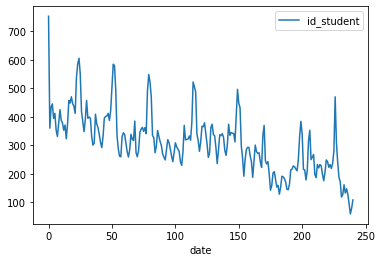

In [13]:
## Your code with comments
lr.groupby("date", as_index=False)["id_student"].nunique().plot(x="date", y="id_student")
# YOUR CODE HERE
#raise NotImplementedError()

# 2. Joins (20 points)

After examining each file and carrying out a few manipulations, you should have a good idea of what is represented in each dataset. Now, you will join these files together.

In joining files together, you will largely leave `student_info.csv` as is. `quizzes_tests.csv` and `learning_resources.csv`, however, are long-form, which means that you will need to be strategic in combining `student_info.csv`, which is wide-form.

## Grading

2.1. (2 points) Filter `quizzes_tests.csv` to include only “Quiz 1”, “Quiz 2”, “Test 1”, and “Test 2”

2.2. (2 points) Join data frame from 2.1 onto `student_info.csv` by `id_student`

2.3. (5 points) Create a grouped box plot with weighted score (`weight` * `score`/100) on the y-axis and "Quiz 1”, “Quiz 2”, “Test 1”, and “Test 2” on the x-axis; use `final_result` to color each box plot, one for "fail" and one for "pass"

2.4. (2 points) Filter `learning_resources.csv` to include only "Resource" `activity_type`

2.5. (2 points) Sum `sum_clicks` by `activity_type` per student 

2.6. (2 points) Join data frame from 2.5 onto `student_info.csv` by `id_student`

2.7. (5 points) Using data frame from 2.6, create a box plot with `sum_clicks` on the y-axis and `activity_type` (i.e., “course_homepage”, “course_page”, “forum”, "resource”, and “wiki”) on the x-axis; use `final_result` to color each box plot, one for "fail" and one for "pass"

For `quizzes_tests.csv`, we are going to select "Quiz 1" and "Quiz 2" and "Test 1" and "Test 2" for each student. Then, we are going to join on `student_info`.

2.1. (2 points) Filter `quizzes_tests.csv` to include only “Quiz 1”, “Quiz 2”, “Test 1”, and “Test 2”

In [14]:
## Your code with comments
qt_filter=qt[qt["assignment_name"].isin(["Quiz 1", "Quiz 2", "Test 1", " Test 2"])]
qt_filter.head()
# YOUR CODE HERE
#raise NotImplementedError()

,id_student,assignment_name,due_date,weight,date_submitted,score
0,41060,Quiz 1,23,2.0,25.0,77
1,41060,Test 1,25,7.5,24.0,85
2,41060,Quiz 2,51,3.0,54.0,94
14,45664,Quiz 1,23,2.0,25.0,47
15,45664,Test 1,25,7.5,25.0,66


2.2. (2 points) Join data frame from 2.1 onto `student_info.csv` by `id_student`

In [15]:
## Your code with comments
si_merge=si.merge(qt_filter, on="id_student")
si_merge.head()
# YOUR CODE HERE
#raise NotImplementedError()

,id_student,gender,highest_education,disability,final_result,assignment_name,due_date,weight,date_submitted,score
0,41060,M,Some Higher Education,N,Fail,Quiz 1,23,2.0,25.0,77
1,41060,M,Some Higher Education,N,Fail,Test 1,25,7.5,24.0,85
2,41060,M,Some Higher Education,N,Fail,Quiz 2,51,3.0,54.0,94
3,45664,M,Some Higher Education,N,Pass,Quiz 1,23,2.0,25.0,47
4,45664,M,Some Higher Education,N,Pass,Test 1,25,7.5,25.0,66


2.3. (5 points) Create a grouped box plot with weighted score (`weight` * `score`/100) on the y-axis and "Quiz 1”, “Quiz 2”, “Test 1”, and “Test 2” on the x-axis; use `final_result` to color each box plot, one for "fail" and one for "pass"

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='assignment_name', ylabel='weighted_score'>

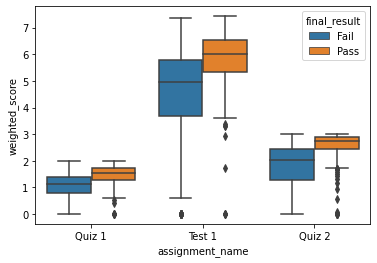

In [17]:
## Your code with comments
si_merge["weighted_score"]=si_merge["weight"]*si_merge["score"]/100
sns.boxplot(data=si_merge, x="assignment_name", y="weighted_score", hue="final_result")
# YOUR CODE HERE
#raise NotImplementedError()

2.4. (2 points) Filter `learning_resources.csv` to include only "Resource" `activity_type`

In [18]:
## Your code with comments
# YOUR CODE HERE
lr[lr["activity_type"]=="resource"]
#raise NotImplementedError()

,id_student,activity_type,activity_id,date,sum_click
0,420388,resource,219,0,1
3,420388,resource,229,0,2
8,409109,resource,219,0,1
9,409109,resource,229,0,2
11,409109,resource,246,0,1
...,...,...,...,...,...
443308,544839,resource,246,240,3
443311,557742,resource,246,240,1
443314,560444,resource,246,240,3
443321,535831,resource,246,240,1


2.5. (2 points) Sum `sum_clicks` by `activity_type` per student 

In [19]:
## Your code with comments
# YOUR CODE HERE
lr_filter=lr.groupby(["activity_type", "activity_id", "id_student"], as_index=False)["sum_click"].sum()
lr_filter
#raise NotImplementedError()

,activity_type,activity_id,id_student,sum_click
0,course_homepage,1,41060,80
1,course_homepage,1,45664,287
2,course_homepage,1,52014,98
3,course_homepage,1,53488,311
4,course_homepage,1,60135,822
...,...,...,...,...
97581,wiki,9,2377623,14
97582,wiki,9,2459878,4
97583,wiki,9,2501768,10
97584,wiki,9,2677955,2


2.6. (2 points) Join data frame from 2.5 onto `student_info.csv` by `id_student`

In [20]:
## Your code with comments
# YOUR CODE HERE
si_lr=si.merge(lr_filter, on="id_student")
#raise NotImplementedError()

2.7. (5 points) Using data frame from 2.6, create a box plot with `sum_clicks` on the y-axis and `activity_type` (i.e., “course_homepage”, “course_page”, “forum”, "resource”, and “wiki”) on the x-axis; use `final_result` to color each box plot, one for "fail" and one for "pass"

<AxesSubplot:xlabel='activity_type', ylabel='sum_click'>

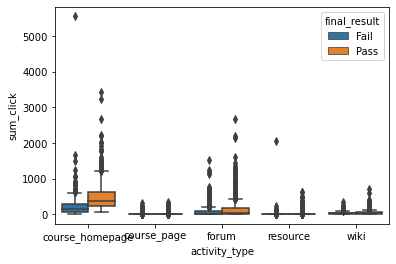

In [21]:
## Your code with comments
# YOUR CODE HERE
sns.boxplot(data=si_lr, x="activity_type", y="sum_click", hue="final_result")
#raise NotImplementedError()

# 3. Interpret (10 points)

After developing an initial understanding of the above datasets, provide your thoughts on the following questions:

3.1. What variables from `quizzes_tests.csv` and `learning_resources.csv` are related to course success, and why? (5 points)

The variable from quizzes_tests.csv that is related to course success is date_submitted and every student should have the same number of rows because each student had the opportunity to take the same quizzes and tests. The variable from learning_resources.csv that is related to course success is activity_type because the files include "course_homepage", "course_page", “resource”, and interactive sections of the course.  

3.2. What relationships between variables from `quizzes_tests.csv` and `learning_resources.csv` and `final_result` surprised you, and why? (5 points)

Quiz 1 and quiz 2 were already showing a big difference for the pass and fail groups. I thought they would be closer on the earlier assignments.